In [17]:
%config InlineBackend.figure_formats = ['svg']

In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
class Classifier(nn.Module):

    def __init__(self, input, hidden, output) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input, hidden),
            nn.Sigmoid(),
            nn.Linear(hidden, output),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.Adagrad(self.parameters(), lr=0.1)
        # self.optimizer = torch.optim.SGD(self.parameters(), lr=0.1)

    def forward(self, x):
        return self.model(x)


In [20]:
net = Classifier(2, 47, 2)

In [21]:
x = torch.Tensor([
    [0.01, 0.01],
    [0.01, 0.99],
    [0.99, 0.01],
    [0.99, 0.99],
])
t = torch.Tensor([
    [0.45, 0.21],
    [0.01, 0.32],
    [0.50, 0.77],
    [0.17, 0.87],
])
x, t

(tensor([[0.0100, 0.0100],
         [0.0100, 0.9900],
         [0.9900, 0.0100],
         [0.9900, 0.9900]]),
 tensor([[0.4500, 0.2100],
         [0.0100, 0.3200],
         [0.5000, 0.7700],
         [0.1700, 0.8700]]))

In [22]:
net.forward(x)

tensor([[0.5557, 0.3826],
        [0.5532, 0.3712],
        [0.5482, 0.4050],
        [0.5463, 0.3924]], grad_fn=<SigmoidBackward0>)

In [23]:
net = Classifier(2, 47, 2)

epoch = 1000

bar = tqdm(range(epoch))

loss_list = []

for _ in bar:
    y = net.forward(x)

    loss = net.loss_function(y, t)

    net.optimizer.zero_grad()

    loss.backward()

    net.optimizer.step()

    loss_list.append(loss.item())

print('y:', net.forward(x))
print('t:', t)

100%|██████████| 1000/1000 [00:00<00:00, 1451.54it/s]

y: tensor([[0.4477, 0.2075],
        [0.0310, 0.3217],
        [0.5029, 0.7737],
        [0.1644, 0.8649]], grad_fn=<SigmoidBackward0>)
t: tensor([[0.4500, 0.2100],
        [0.0100, 0.3200],
        [0.5000, 0.7700],
        [0.1700, 0.8700]])


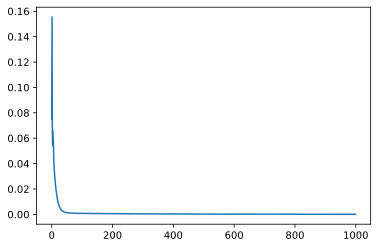

In [24]:
plt.plot(loss_list)
plt.show()